In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
image = cv2.imread("Dhoni2.jpeg") 
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

original_shape = image.shape
print(image.shape)

(365, 700, 3)


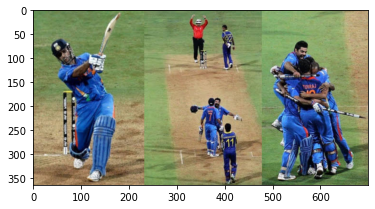

In [3]:
plt.imshow(image)
plt.show()

In [4]:
pixel_values  = image.reshape((-1,3))
print(pixel_values.shape)

(255500, 3)


In [5]:
from sklearn.cluster import KMeans

K =  1
[[122 131 105]]


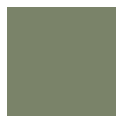

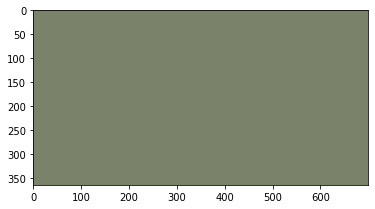

K =  2
[[143 149 107]
 [ 39  57  96]]


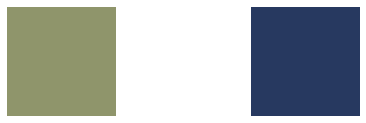

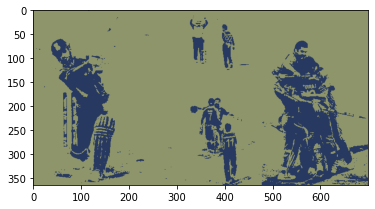

K =  3
[[ 54  99 177]
 [145 150 103]
 [ 37  42  60]]


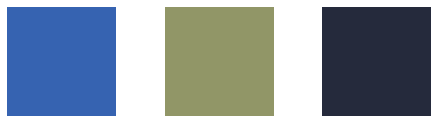

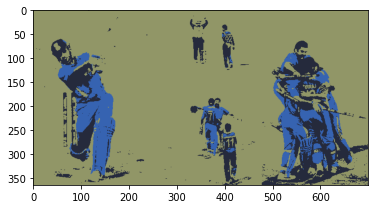

K =  4
[[169 163 120]
 [122 137  88]
 [ 31  36  58]
 [ 52  97 176]]


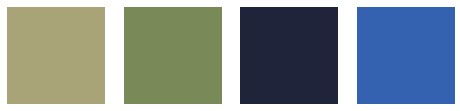

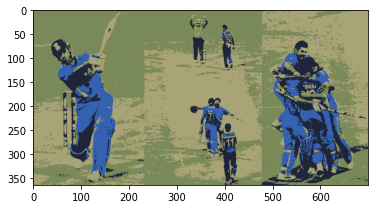

K =  5
[[ 52  97 176]
 [186 167 133]
 [ 28  34  58]
 [145 154 104]
 [114 128  82]]


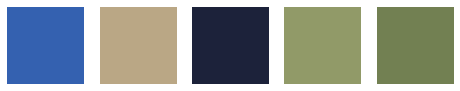

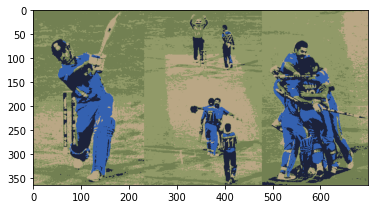

K =  10
[[115 137  86]
 [ 23  43 106]
 [183 163 123]
 [ 83 135 210]
 [ 90  82  62]
 [ 18  19  32]
 [138 163 106]
 [203 207 210]
 [ 41  84 165]
 [161 134  97]]


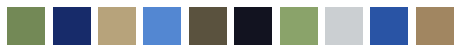

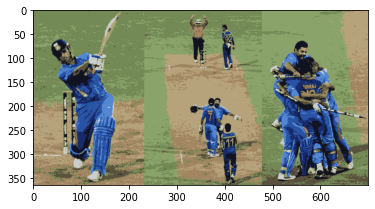

K =  15
[[124 148  94]
 [ 19  34  89]
 [187 166 126]
 [168 144 104]
 [ 50  98 180]
 [ 76  74  58]
 [136 110  80]
 [126 135 152]
 [106 133  80]
 [141 168 108]
 [ 30  65 141]
 [205 210 212]
 [ 16  16  27]
 [181  48  45]
 [ 83 142 224]]


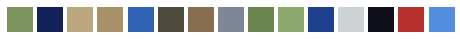

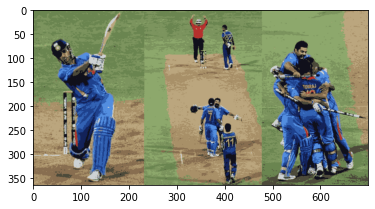

K =  20
[[176 154 113]
 [ 15  28  79]
 [125 150  95]
 [ 58 112 198]
 [130 136 148]
 [ 76  95 137]
 [220 224 225]
 [177 180 183]
 [ 13  13  23]
 [109 136  82]
 [142 168 108]
 [ 91  93  65]
 [136 110  79]
 [ 31  78 167]
 [ 59  56  48]
 [183  48  46]
 [191 170 129]
 [ 25  52 123]
 [ 91 151 228]
 [160 137  98]]


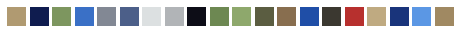

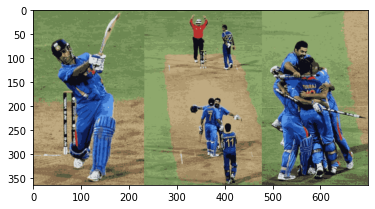

K =  25
[[101 127  73]
 [ 14  24  71]
 [178 155 114]
 [ 61 124 222]
 [143 170 109]
 [192 171 130]
 [ 25  65 150]
 [ 11  11  21]
 [224 228 230]
 [163 140 101]
 [115 141  87]
 [144 119  84]
 [147 151 157]
 [188 190 190]
 [116 117 124]
 [118  93  68]
 [ 63  80 125]
 [103 160 228]
 [ 75  79  59]
 [ 50  44  40]
 [186  48  45]
 [ 80 117 174]
 [ 22  43 110]
 [129 153  98]
 [ 38  90 181]]


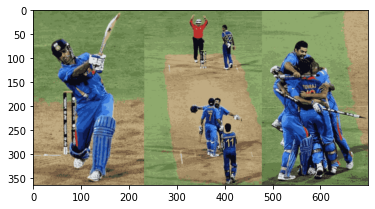

K =  35
[[121 147  92]
 [ 18  31  85]
 [192 195 196]
 [ 62  97 159]
 [176 153 112]
 [ 65  61  50]
 [151 126  89]
 [ 30  83 178]
 [ 10  10  16]
 [ 94 128 180]
 [144 172 111]
 [ 26  65 149]
 [226 230 231]
 [133 108  75]
 [111 138  84]
 [128 161 102]
 [ 39  35  33]
 [166 141 101]
 [ 19  45 119]
 [ 50 107 202]
 [196 175 135]
 [141  36  34]
 [108  84  62]
 [156 160 165]
 [112 167 230]
 [101  99 112]
 [186 165 122]
 [ 54  67 109]
 [132 132 133]
 [ 75  96  61]
 [ 70 136 231]
 [211  59  55]
 [ 10  16  52]
 [100 126  72]
 [141 154 100]]


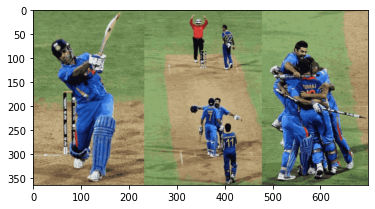

K =  45
[[ 65  53  45]
 [137 172 109]
 [112 139  85]
 [ 70 112 177]
 [179 156 115]
 [105 138 186]
 [194 196 196]
 [ 39  46  80]
 [143 159 103]
 [146 120  85]
 [  8  12  40]
 [ 52  71 120]
 [111 103 105]
 [ 84 151 236]
 [197 176 136]
 [ 27  80 175]
 [227 230 232]
 [212  59  55]
 [118 147  93]
 [ 87 114  65]
 [188 167 124]
 [ 12  22  71]
 [129 104  71]
 [132 145  92]
 [ 63  85  51]
 [ 93 109 141]
 [137 135 135]
 [160 163 166]
 [ 10   9  13]
 [160 135  96]
 [ 23  63 150]
 [ 61 123 222]
 [104 130  75]
 [ 36  33  31]
 [142  37  35]
 [106  82  58]
 [151 173 114]
 [124 174 229]
 [ 21  48 123]
 [127 158 100]
 [171 146 106]
 [ 52  87 155]
 [ 41  98 196]
 [ 14  33  99]
 [ 80  75  82]]


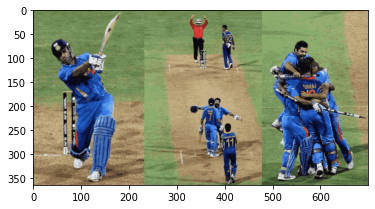

In [6]:
for j in range(1, 46):
    K=j
    if((K<=5) or (K==10) or (K==15) or (K==20) or (K==25) or (K==35) or (K==45) ):
        print("K = ", K)
        km = KMeans(n_clusters=K)
        km.fit(pixel_values)
    
        centers = km.cluster_centers_
        centers = np.array(centers,dtype='uint8')
        print(centers)

        i=1
        plt.figure(0,figsize=(8,2))
        colors = []
        for each_col in centers:
            plt.subplot(1,K,i)
            plt.axis("off")
            i+=1
    
            colors.append(each_col)
    
            # Color Swatch
            a = np.zeros((100,100,3),dtype='uint8')
            a[:,:,:] = each_col
            plt.imshow(a)
        plt.show()
    
        new_image = np.zeros((365*700,3),dtype='uint8')
    
    
        for i in range(new_image.shape[0]):
            new_image[i] = colors[km.labels_[i]]
    
        new_image = new_image.reshape((original_shape))
        plt.imshow(new_image)
        plt.show()
    